# Pymaceuticals Inc.
---

### Analysis
1.We can see a number of different charts that show and represent the data. Some charts are more usefull than others. When we look at the bar charts we can see the number of different regimens being studied and the number of mice per timepoint. When we look at the pie charts, yes it works for gender analysis. But if you were going to compare/view more than two variables, I dont think a pie chart would be the best representation. 

2.When looking at mouse l509, the bar chart was a great way to view the progress of the drug Capomulin. We can clearly see the size of the tumors as time goes on. 

3.We can see there is a stong correlation for the Capomulin regemin between average weight and the final tumor volume. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data_df = pd.merge(mouse_metadata, study_results, how = 'outer', on = ['Mouse ID', 'Mouse ID'])

# Display the data table for preview
merge_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(merge_data_df['Mouse ID'].unique())
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merge_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicated_miceID = merge_data_df.loc[duplicated_mice, 'Mouse ID'].unique()
duplicated_miceID

#come back to...not all the way finished #may need to print something out

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_miceID_data = merge_data_df.loc[merge_data_df['Mouse ID'] == duplicated_miceID[0]]
duplicated_miceID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merge_data_df.drop(duplicated_miceID_data.index)

clean_data_df.to_csv('data/clean_dara.csv', index=False, header=True)
clean_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_data_df['Mouse ID'].unique())
num_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_reg = clean_data_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_reg['Tumor Volume (mm3)'].mean()
median = drug_reg['Tumor Volume (mm3)'].median()
var = drug_reg['Tumor Volume (mm3)'].var()
std = drug_reg['Tumor Volume (mm3)'].std()
sem = drug_reg['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard deviation': std,
    'SEM': sem
})

summary_stats_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_table = drug_reg['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

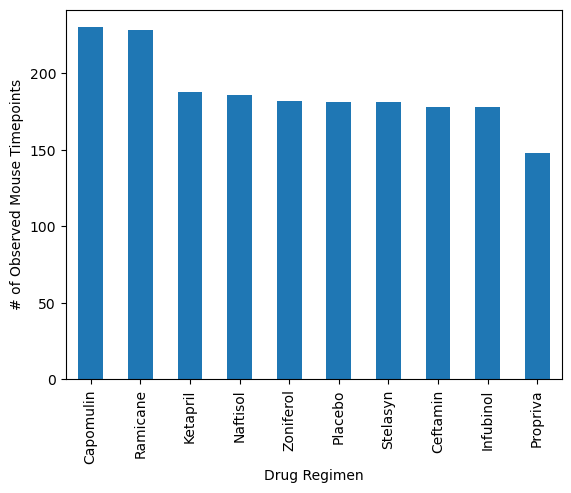

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#number of mice for each drug regimen
num_mice_per_reg = drug_reg['Mouse ID'].count().sort_values(ascending=False)
#num_mice_per_reg  #counts correctly

#bar chart
mice_per_reg_bar = num_mice_per_reg.plot(kind='bar', width=0.5)
mice_per_reg_bar.set_xlabel('Drug Regimen')
mice_per_reg_bar.set_ylabel('# of Observed Mouse Timepoints')

#saving image
# plt.tight_layout()
# mice_per_reg_bar.figure.savefig('images/mice_per_reg_bar.png')

plt.show()
plt.close()

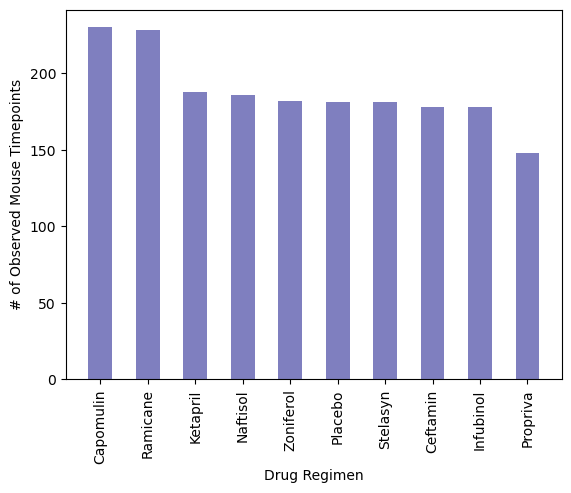

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis_reg = np.arange(len(num_mice_per_reg))
reg_name = list(num_mice_per_reg.index.values)

bar_mice_per_reg = plt.bar(x_axis_reg, num_mice_per_reg, color = 'navy', alpha=0.5, width=0.5)

plt.xticks(x_axis_reg, reg_name, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()
plt.close()


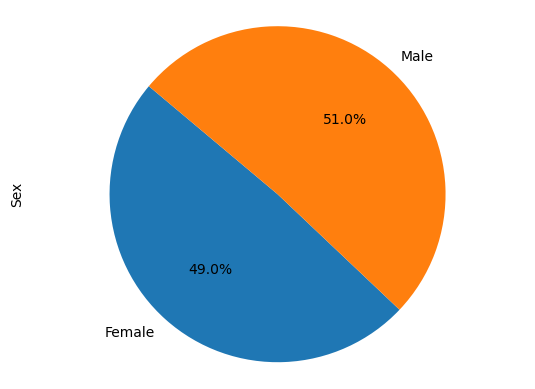

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice = clean_data_df.groupby('Sex')['Sex'].count()#count works

pie_mice_sex = sex_mice.plot(kind = 'pie', autopct='%1.1f%%', startangle=140)
plt.axis("equal")
pie_mice_sex.set_ylabel('Sex')

plt.show()
plt.close()

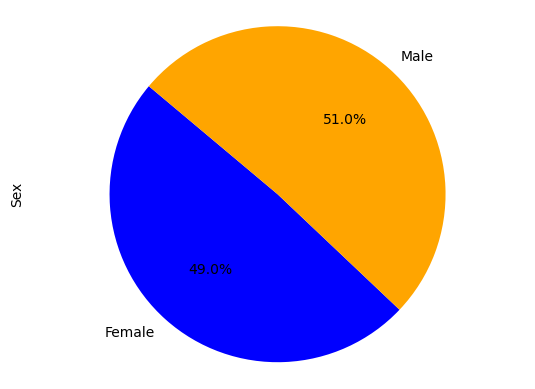

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = sex_mice.index
colors = ['blue','orange']

mice_sex_pie = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%", colors=colors, startangle=140)
plt.axis("equal")
plt.ylabel("Sex")

plt.show()
plt.close()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_vol = clean_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()

final_tumor_df['Drug Regimen'].value_counts()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Ramicane     25
Zoniferol    25
Propriva     24
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [22]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_vol_list.append(final_tumor_vol)

    #calc IQR
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowq = quartiles[0.25]
    upq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upq-lowq
    lower_bound = lowq - (1.5*iqr)
    upper_bound = upq + (1.5*iqr)
    
     # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    #print
    print(f'{drug} potential outliers: {outliers}') #correct print
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


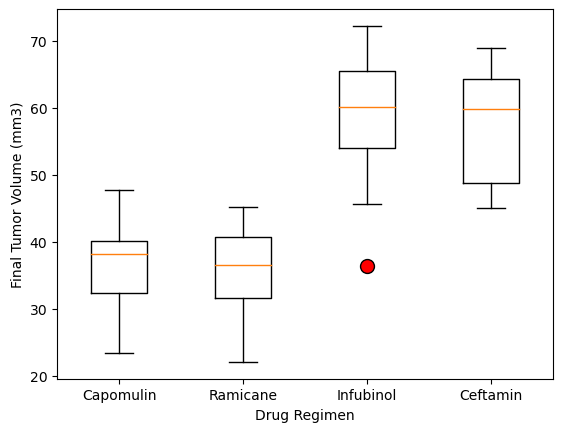

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor': 'r', 'markersize': 10})

final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')
plt.show()
plt.close()


## Line and Scatter Plots

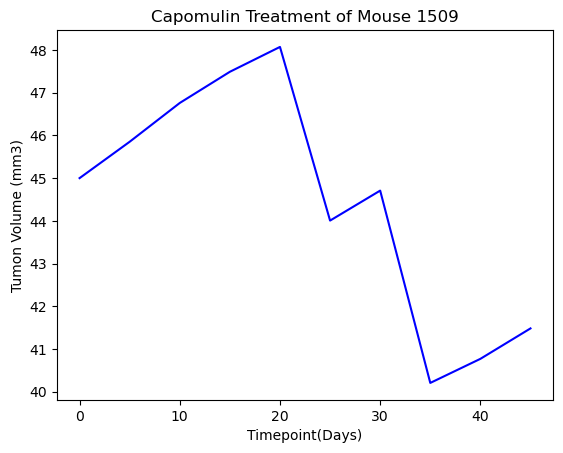

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
mouse_id = 'l509' #i think this is my issue
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

time_vol = plt.plot(mouse_df['Timepoint'], mouse_df ['Tumor Volume (mm3)'], color='blue')
plt.title(f'Capomulin Treatment of Mouse 1509')
plt.xlabel('Timepoint(Days)')
plt.ylabel('Tumon Volume (mm3)')

plt.show()
plt.close()



C:\Users\ilian\AppData\Local\Temp\ipykernel_4628\4052711811.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()


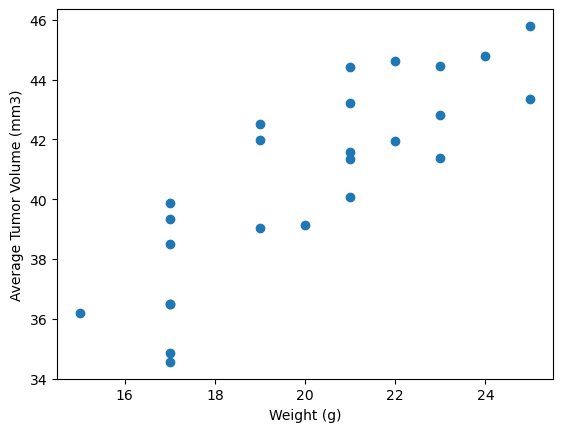

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()
mice_weight_avg = Capomulin_gp['Weight (g)']
mice_tumor_avg = Capomulin_gp['Tumor Volume (mm3)']

plt.scatter(mice_weight_avg, mice_tumor_avg)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
plt.close()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


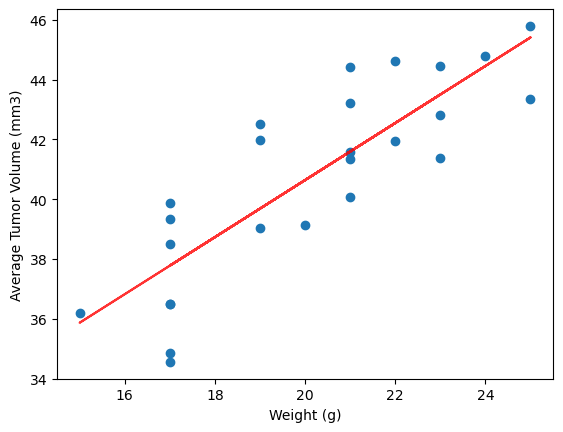

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_val = mice_weight_avg
y_val = mice_tumor_avg

correlation = round(st.pearsonr(x_val, y_val)[0],2)
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')

#lin regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

#calc rsquared
r_squared =round(rvalue**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_val = x_val * slope + intercept

plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, color = 'r', alpha=0.8)


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
plt.close()